In [1]:
%matplotlib inline

In [2]:
from mne.inverse_sparse.mxne_inverse import _make_sparse_stc
from mne import read_forward_solution
from mne.viz import plot_sparse_source_estimates
import mne

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os 

# please update your paths
os.environ['SUBJECTS_DIR'] = '/home/anujanegi/tj/bdsg/freesurfer/subjects'
PATH_TO_ESTIMATES = "bsi_zoo/tests/data/estimates"
PATH_TO_SAVE_FIGURES = "figures"
SOLVER_NAMES = ['iterative_L1' , 'iterative_L2', 'iterative_sqrt', 'iterative_L1_typeII', 'iterative_L2_typeII', 'gamma_map']
SUBJECTS = ["CC120166", "CC120264", "CC120309", "CC120313"]

mne.viz.set_3d_backend('pyvista')
HEMISPHERES = ["lh", "rh"]
# ['iterative_L1' , 'iterative_L2', 'iterative_sqrt', 'iterative_L1_typeII', 'iterative_L2_typeII', 'gamma_map']

Using pyvista 3d backend.



In [4]:
def add_foci_to_brain_surface(brain, stc, ax, color, label):
    for i_hemi, hemi in enumerate(HEMISPHERES):
        surface_coords = brain.geo[hemi].coords
        hemi_data = stc.lh_data if hemi == "lh" else stc.rh_data
        
        for k in range(len(stc.vertices[i_hemi])):
            activation_idx = stc.vertices[i_hemi][k]
            foci_coords = surface_coords[activation_idx]

            # In milliseconds
            (line,) = ax.plot(stc.times * 1e3, 1e9 * hemi_data[k], color=color, label=label)
            brain.add_foci(foci_coords, hemi=hemi, color=line.get_color(), alpha=0.5, name=label)

    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Amplitude (nAm)")
    ax.legend()

------------------------------
Making figures for iterative L1 method for subject CC120166...
------------------------------
Reading forward solution from bsi_zoo/tests/data/CC120166-fwd.fif...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (5123 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
No vertices estimated!
------------------------------
Making figures for iterative L2 method for subject CC120166...
------------------------------
Reading forward solution from bsi_zoo/tests/data/CC120166-fwd.fif...
    Reading a source space...
    [done]
  

    [done]
    2 source spaces read
------------------------------
Making figures for iterative L2 typeII method for subject CC120264...
------------------------------
Reading forward solution from bsi_zoo/tests/data/CC120264-fwd.fif...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (5123 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
------------------------------
Making figures for gamma map method for subject CC120264...
-------------------

    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
------------------------------
Making figures for iterative sqrt method for subject CC120313...
------------------------------
Reading forward solution from bsi_zoo/tests/data/CC120313-fwd.fif...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (5124 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Changing to fixed-orientation forward solution with surface-based source orientations...
    [done]
    Reading a source space...
    [done]
    Re

<ipython-input-5-982233b96f1a>:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1)


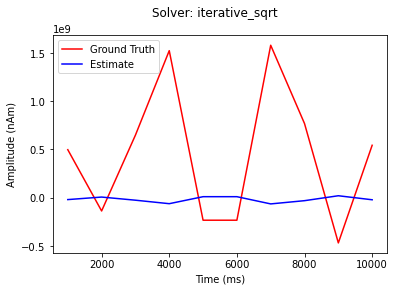

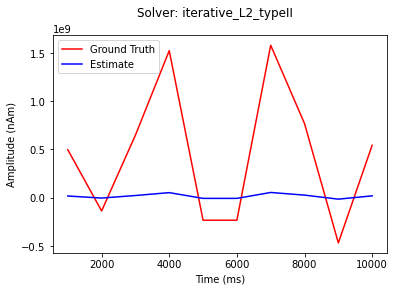

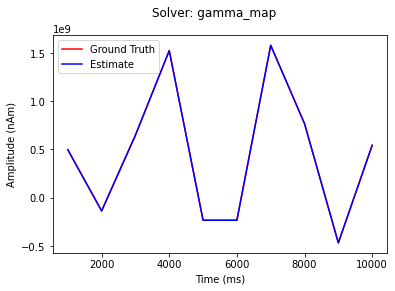

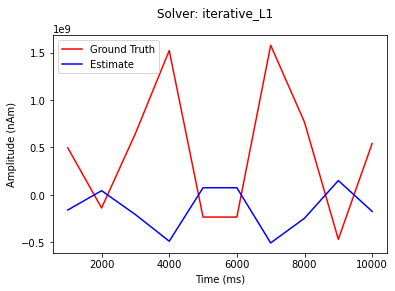

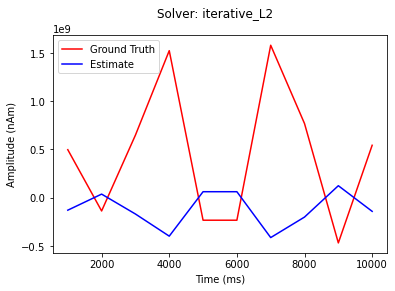

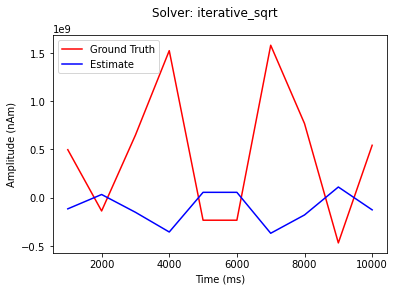

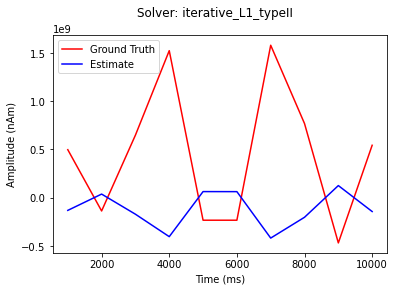

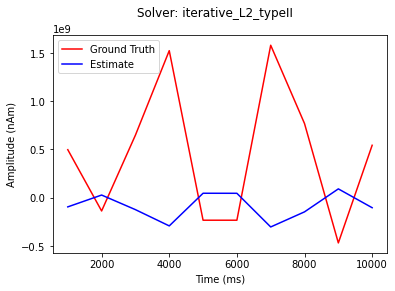

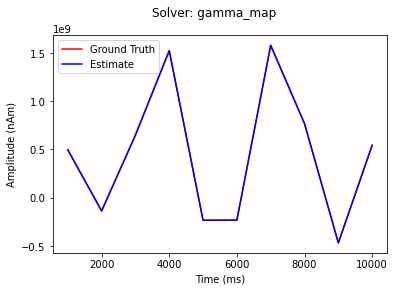

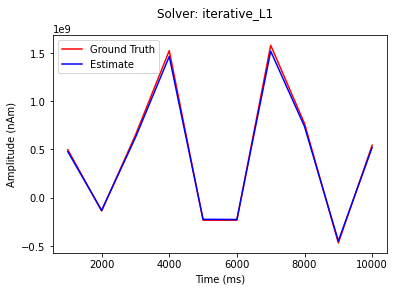

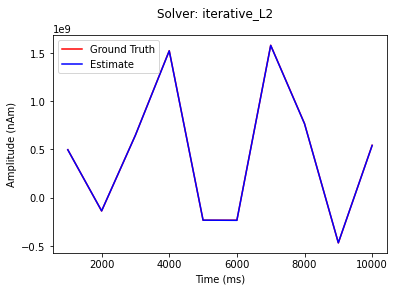

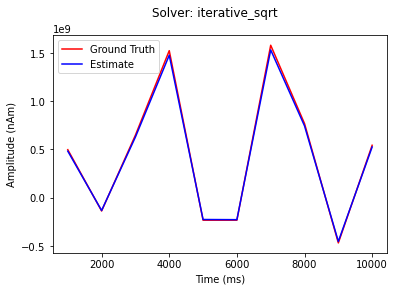

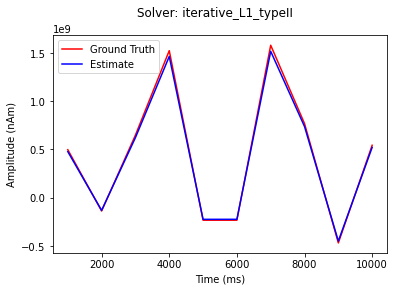

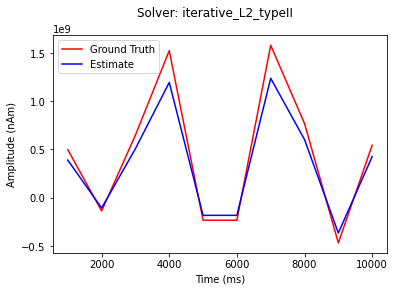

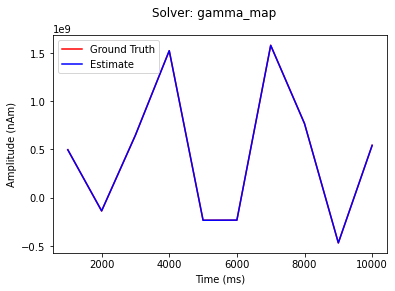

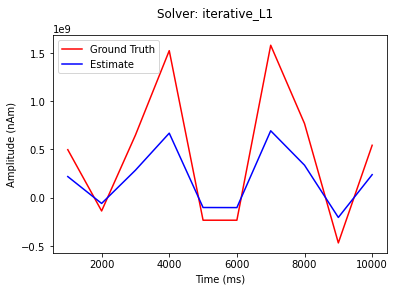

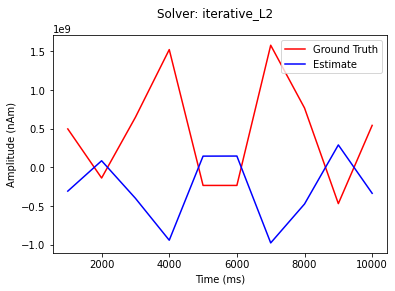

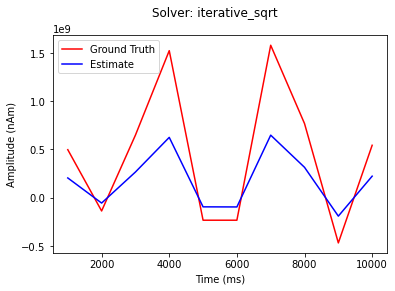

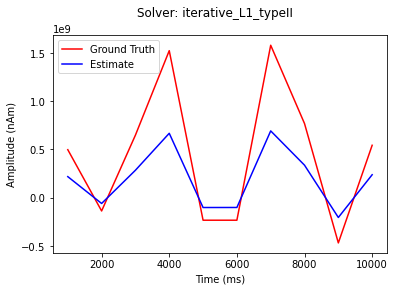

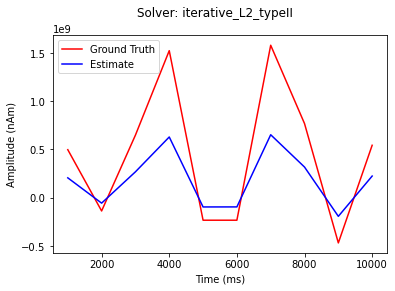

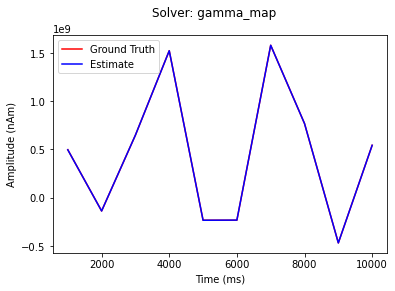

In [5]:
for subject in SUBJECTS:
    for solver in SOLVER_NAMES:
            print('-'*30)
            print('Making figures for %s method for subject %s...'%(solver.replace('_', ' '), subject))
            print('-'*30)
            
            x = np.load(os.path.join(PATH_TO_ESTIMATES, subject, solver+'_x_10.npy'))
            x_hat = np.load(os.path.join(PATH_TO_ESTIMATES, subject, solver+'_x_hat_10.npy'))

            fwd_fname = "bsi_zoo/tests/data/%s-fwd.fif"%subject
            fwd = read_forward_solution(fwd_fname)
            fwd = mne.convert_forward_solution(fwd, force_fixed=True)
            active_set = np.linalg.norm(x, axis=1) != 0
            
            # check if no vertices are estimated
            temp = np.linalg.norm(x_hat, axis=1)
            if len(np.unique(temp))==1:
                print("No vertices estimated!")
                continue
            # hacky way
            active_set_hat = temp == np.max(temp)

            stc = _make_sparse_stc(
                x[active_set], active_set, fwd, tmin=1, tstep=1
            )  # ground truth
            stc_hat = _make_sparse_stc(
                x_hat[active_set_hat], active_set_hat, fwd, tmin=1, tstep=1
            )  # estimate
            
            source_space = mne.read_source_spaces(fwd_fname)
            
#             plot_sparse_source_estimates(
#                 source_space, [stc, stc_hat], bgcolor=(1, 1, 1),
#                 fig_name=solver, opacity=0.1, colors=['r','b']
#             )
         
            brain = mne.viz.Brain(
                subject_id=subject,
                views=["lat", "med"],
#                 views=["lat"],
                hemi="split" if len(HEMISPHERES) > 1 else HEMISPHERES[0],
                size=(500, 250),
                # size=(500, 500),
                background="w",
                surf='inflated',
                cortex="classic",
                show_toolbar=True
            )

            brain.add_text(34, 50,'dsd',name='dsdsadsadasdaa', row=0, col=0)
            fig, ax = plt.subplots(1, 1)
            add_foci_to_brain_surface(brain, stc, ax, color=(1, 0, 0), label='Ground Truth') #red
            add_foci_to_brain_surface(brain, stc_hat, ax, color=(0, 0, 1), label='Estimate') #blue
            fig.suptitle('Solver: %s'%solver)
            plt.savefig(os.path.join(PATH_TO_SAVE_FIGURES, '%s_%s.jpg'%(solver, subject)))
            brain.save_image(os.path.join(PATH_TO_SAVE_FIGURES, '%s_%s.png'%(solver, subject)))